In [1]:
import zipfile

with zipfile.ZipFile('datos.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [2]:
import pandas as pd
import numpy as np
from os import listdir
import matplotlib.pyplot as plt
import pickle

np.random.seed(0)

In [3]:
def save_object(o, name):
    # open a file
    with open(name,'wb') as f:
        # dump object to that file
        pickle.dump(o,f)
    
def load_object(name):
    # open a file, where you stored the pickled data
    with open(name,'rb') as f:
        return pickle.load(f)

In [4]:
trozoG = pd.read_csv("Datos/TrozoG.txt", names = ["LP", "VD","T"],
                     usecols = [0, 1, 2],
                     delimiter = "\t", skiprows = range(3), 
                     index_col = False, decimal = ",")

trozoG.head(10)

,LP,VD,T
0,-0.006104,0.064697,0.120239
1,-0.004272,0.075989,0.126343
2,-0.003357,0.087280,0.125427
3,-0.005188,0.092468,0.123596
4,-0.007324,0.093384,0.118713
5,-0.010681,0.089722,0.105896
6,-0.004883,0.086975,0.127258
7,0.004272,0.092468,0.111084
8,0.002441,0.087585,0.114136
9,0.003357,0.080872,0.110779


/tmp/ipykernel_10719/3650936539.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis',cols + len(lines))


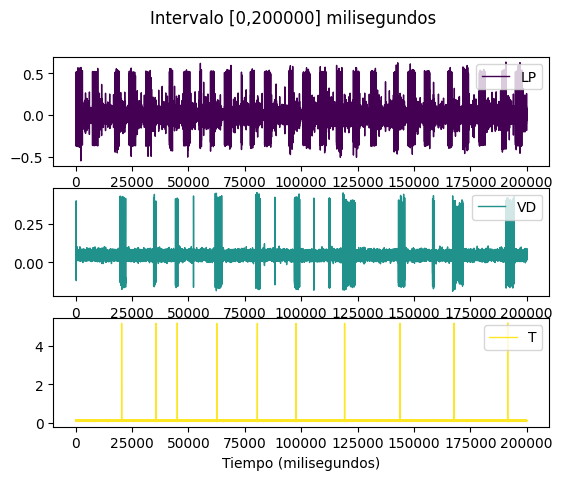

In [5]:
def plot_data_interval_lines(
            data: pd.DataFrame = trozoG, 
            lines: list = [], 
            lines_titles: list = [], 
            x: list = [0,10000]
    ):
    
    cols = len(data.columns)
    if len(lines) > 0 and len(lines) != cols:
        raise ValueError("Incorrect number of lines passed")
    
    x_values = np.arange(x[0],x[1],1)
    
    colors = plt.cm.get_cmap('viridis',cols + len(lines))

    fig, axs = plt.subplots(cols)
    fig.suptitle('Intervalo [{},{}] milisegundos'.format(x[0],x[1]))

    for j in range(cols):
        axs[j].plot(x_values, data.iloc[:, j][x[0]:x[1]], label = data.columns[j],color = colors(j),linewidth = 1)
        if len(lines) > 0:
            y_values = [lines[j] for i in x_values]
            axs[j].plot(x_values,y_values,color = colors(j+cols),label = lines_titles[j], linewidth = 1)
            
        axs[j].legend(loc="upper right")
        

    axs[cols-1].set_xlabel('Tiempo (milisegundos)')
    plt.show()

plot_data_interval_lines(trozoG, x = [0,200000])

Estos histogramas los he creado para ver más o menos las distribuciones de amplitudes de tal forma que podemos ver cuándo aumentan, es decir, que aparece el grupo de las spikes, frente al grupo del estado en reposo. Es un poco difuso las distinciones y no sé si hay alguna forma mejor de separarlas que a ojo, pero bueno. 99,7% que es lo que habían hecho Sáez y compañía me parece excesivo pero no estoy seguo. Siempre podemos preguntar al profesor o a cualquiera de estos el criterio que han seguido.

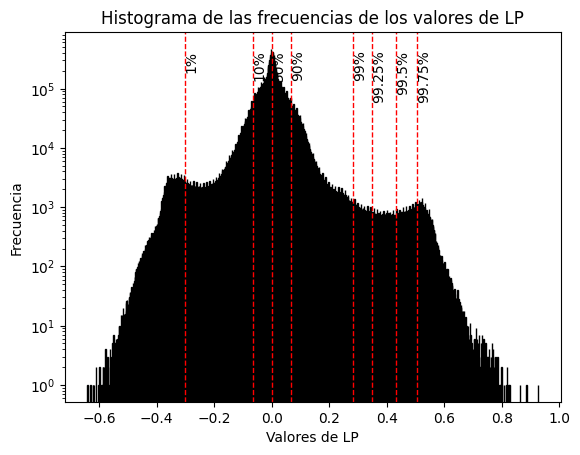

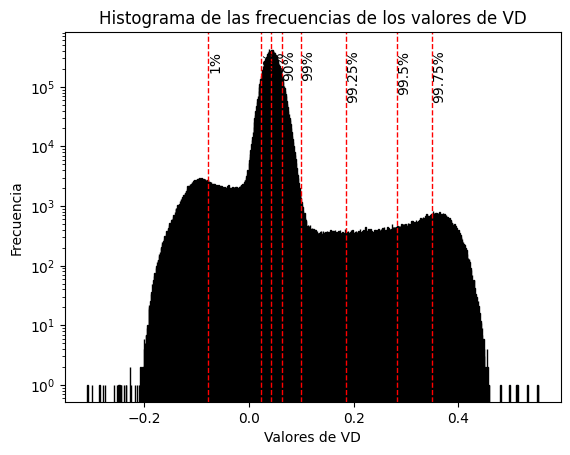

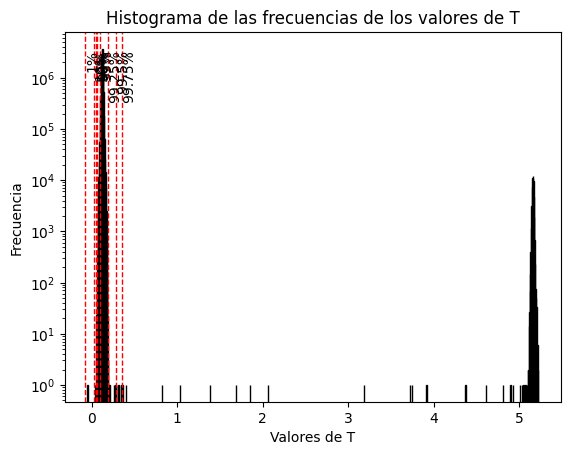

In [6]:
percentiles = [1, 10, 50, 90, 99, 99.25, 99.5, 99.75]

decilesLP = np.percentile(trozoG['LP'], percentiles)
plt.hist(trozoG['LP'], bins=1000, edgecolor='black')
for decil, perc in zip(decilesLP, percentiles):
    plt.axvline(decil, color='red', linestyle='dashed', linewidth=1)
    plt.text(decil, plt.ylim()[1] * 0.9, f'{perc}%', rotation=90, verticalalignment='top')
plt.xlabel('Valores de LP')
plt.ylabel('Frecuencia')
plt.title('Histograma de las frecuencias de los valores de LP')
plt.yscale('log')
plt.show()

decilesVD = np.percentile(trozoG['VD'], percentiles)
plt.hist(trozoG['VD'], bins=1000, edgecolor='black')
for decil, perc in zip(decilesVD, percentiles):
    plt.axvline(decil, color='red', linestyle='dashed', linewidth=1)
    plt.text(decil, plt.ylim()[1] * 0.9, f'{perc}%', rotation=90, verticalalignment='top')
plt.xlabel('Valores de VD')
plt.ylabel('Frecuencia')
plt.title('Histograma de las frecuencias de los valores de VD')
plt.yscale('log')
plt.show()

decilesT = np.percentile(trozoG['T'], percentiles)
plt.hist(trozoG['T'], bins=1000, edgecolor='black')
for decil, perc in zip(decilesVD, percentiles):
    plt.axvline(decil, color='red', linestyle='dashed', linewidth=1)
    plt.text(decil, plt.ylim()[1] * 0.9, f'{perc}%', rotation=90, verticalalignment='top')
plt.xlabel('Valores de T')
plt.ylabel('Frecuencia')
plt.title('Histograma de las frecuencias de los valores de T')
plt.yscale('log')
plt.show()

In [7]:
def get_percentiles(data: pd.DataFrame,
                    q: list = []
                    ):
    perc = data.quantile(q)
    return np.diag(perc)

Percentiles:
 [0.432129 0.282593 5.151672]


/tmp/ipykernel_10719/3650936539.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis',cols + len(lines))


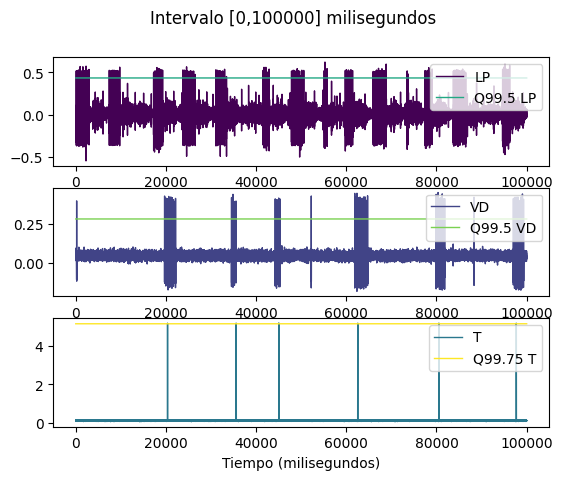

In [8]:
perc = get_percentiles(trozoG, q=[0.995, 0.995, 0.9975])
print("Percentiles:\n {}".format(perc))
plot_data_interval_lines(trozoG,
                         lines = perc,
                         lines_titles = ["Q99.5 LP", "Q99.5 VD", "Q99.75 T"],
                         x = [0,100000])

/tmp/ipykernel_10719/3650936539.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis',cols + len(lines))


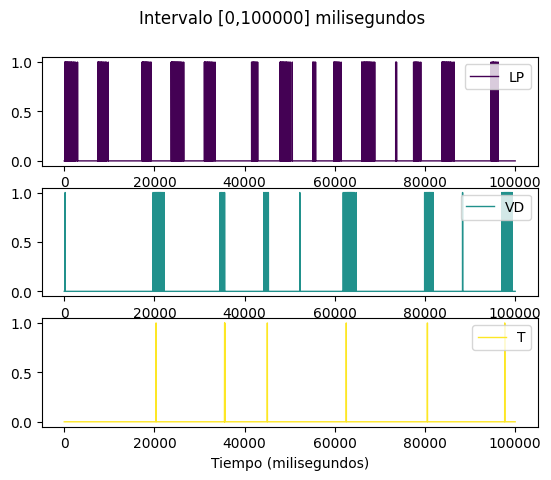

In [9]:
trozoG_umbral = (trozoG > perc).astype(int)
plot_data_interval_lines(trozoG_umbral, x =[0,100000]) 

In [10]:
trozoG_umbral.iloc[20320:20340,:]

,LP,VD,T
20320,0,0,0
20321,0,0,0
20322,0,0,0
20323,0,0,0
20324,0,0,0
20325,0,0,0
20326,0,0,0
20327,0,0,0
20328,0,1,0
20329,0,1,0


In [11]:
def _process_consecutive_ones_vector(vec, i):
    start = i
    while i < len(vec) and vec[i] == 1:
        i += 1
    end = i
    vec[start:end] = 0
    vec[start] = 1
    return i+1  # Devuelve la posicion del siguiente valor despues del 0 que sigue al spike

def minimize_ones_in_dataframe(df: pd.DataFrame) -> pd.DataFrame:
    """
        Ejecución in place
    """
    for col in range(len(df.columns)):
        vec = np.array(df.iloc[:, col])
        i = 0
        while i < len(vec):
            if vec[i] == 1:
                i = _process_consecutive_ones_vector(vec, i)
            else:
                i += 1
        df.iloc[:, col] = vec
    return df

In [12]:
trozoG_minimizado = minimize_ones_in_dataframe(trozoG_umbral.copy())
trozoG_minimizado.iloc[20320:20340,:]

,LP,VD,T
20320,0,0,0
20321,0,0,0
20322,0,0,0
20323,0,0,0
20324,0,0,0
20325,0,0,0
20326,0,0,0
20327,0,0,0
20328,0,1,0
20329,0,0,0


In [13]:
import itertools

def get_zeros_between_spikes(df: pd.DataFrame) -> list[list]:
    arrays_zeros = [ [] for i in range(len(df.columns)) ]
    for col in range(len(df.columns)):
        dtype = [('spike',int),('length',int)]
        vector = np.array([ (x , len(list(y)))
                    for x, y in itertools.groupby(df.iloc[:,col])],
                    dtype=dtype)
        sorted_vector = np.sort(vector,order=['spike','length'])
        arrays_zeros[col] = np.array([v[1] for v in sorted_vector if v[0] == 0])
    return arrays_zeros

spaces_between_ones_sorted = get_zeros_between_spikes(trozoG_minimizado)
spaces_between_ones_sorted

[array([   24,    25,    44, ..., 12603, 12718, 14119]),
 array([   62,    63,    64, ..., 20802, 21351, 21408]),
 array([    1,     1,     1, ..., 44643, 72092, 76316])]

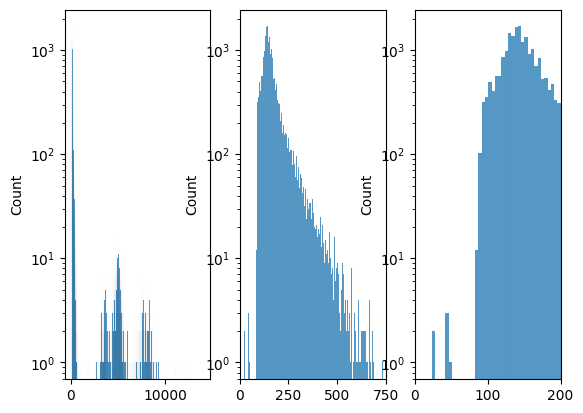

In [17]:
import seaborn as sns

_, (ax1, ax2, ax3) = plt.subplots(1, 3)
a1 = spaces_between_ones_sorted[0]

sns.histplot(a1,ax=ax1)
sns.histplot(a1,ax=ax2)
sns.histplot(a1,ax=ax3)

ax2.set_xlim(0, 750)

ax3.set_xlim(0, 200)

ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')

plt.show()